<a href="https://colab.research.google.com/github/minalee98/QTM350FinalProject/blob/main/ProjectBlog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Accuracy of the Transcribe Service using Different Songs and Audio

Hello Everybody! Welcome to the blog that will walking you through our project in its entirety. If you are reading this, we are glad you decided to embark on this journey with us on our analysis of the Transcribe AWS ML API.

## Using AWS Transcribe to detect song lyrics

How many times have you been listening to a song and wondered what the artist is even saying? 

The answer is too many times. Whether it be because of their accent, the background noise being too loud, or simply that they are singing so fast, it can be hard to pick-up on the lyrics and sing your heart out with them. This forces you to search the lyrics on google. But, how do we know if these lyrics are accurate?

AWS Transcribe is an Amazon Machine Learning API that is supposed to have the answers for these issues. Our project will be centered around using the Transcribe ML API to transcribe different songs and compare the lyrics that it outputs to the lyrics that anyone can search for on google. We want to understand just how accurate the Transcribe service is and how accurate it can be given songs with different speeds, levels of sound regarding background instruments, and artist accents. 

## Our Hypothesis

We believe that the Transcribe service will generate lyrics with a high-level of accuracy for straight-forward songs at regular speeds. However, we believe that increasing the speed of the song will reduce the accuracy of the transcription along with other variables such as: artist accent, and background noise. Often, in order to keep a song in rythm, artists may pronounce words slightly differently in order to keep the song flowing properly. It will be interesting to see if the accuracy of the transcription is effected at all by the phonetics of the artist. Background noice is also a factor. Often in country or rock songs there are many instruments being played while the lead artist is singing and this could potentially effect the accuracy of the transcription. Our analysis will answer all of these questions and show whether AWS Transcribe is useful for finding the lyrics of your favorite songs. 

## Our Data

The data we will collect for our analysis will be comprised of many songs from different genres such as: rap, rock, country, and pop. For each song we will adjust the audio to have three different play-back speeds of: 0.5x, 1x, and 2x. This will allow us to see how the speed of the audio effects the transcription. The different genres of songs will allow us to test different variables such as: phonetics of the artist, artist accent, and background music. Rap songs tend to have a lot of background vocals (ad-libs), rock songs tend to have a lot of background instruments playing, country songs have different accents and phonetics, and pop songs will be our base genre that, we believe, will produce the most accurate transcriptions. 

Now that you have a general understanding of our project, let me explain how AWS Transcribe works. 

## What Is AWS Transcribe?

As per the [AWS Documenation](https://docs.aws.amazon.com/transcribe/?id=docs_gateway), AWS Transcribe is used to  provide transcription services for your audio files. It uses advanced machine learning technologies to recognize spoken words and transcribe them into text. It can transcribe audio files from different languages and also different accents. The latter proved to be an important aspect for our analysis. 

## Getting Started

Now that we have some background knowledge and a basic understanding of the Transcribe API, lets call the service using SageMaker and the CLI to see how it operates. 



### Setting up an IAM Role

In order to use this API within Sagemaker, we will need to update the Role we have been using to control Sagemaker permissions. Recall, when you created your Sagemaker instance, one of the steps was creating a new IAM Role.

#### How can I do this?

First, log-in to your AWS educate account and open SageMaker. Proceed to your notebook instances and click on the name of the instance you will be using Translate on. Scroll down to the 'Permissions and Encryptions' section. Once you are there, your screen should look like the picture below.

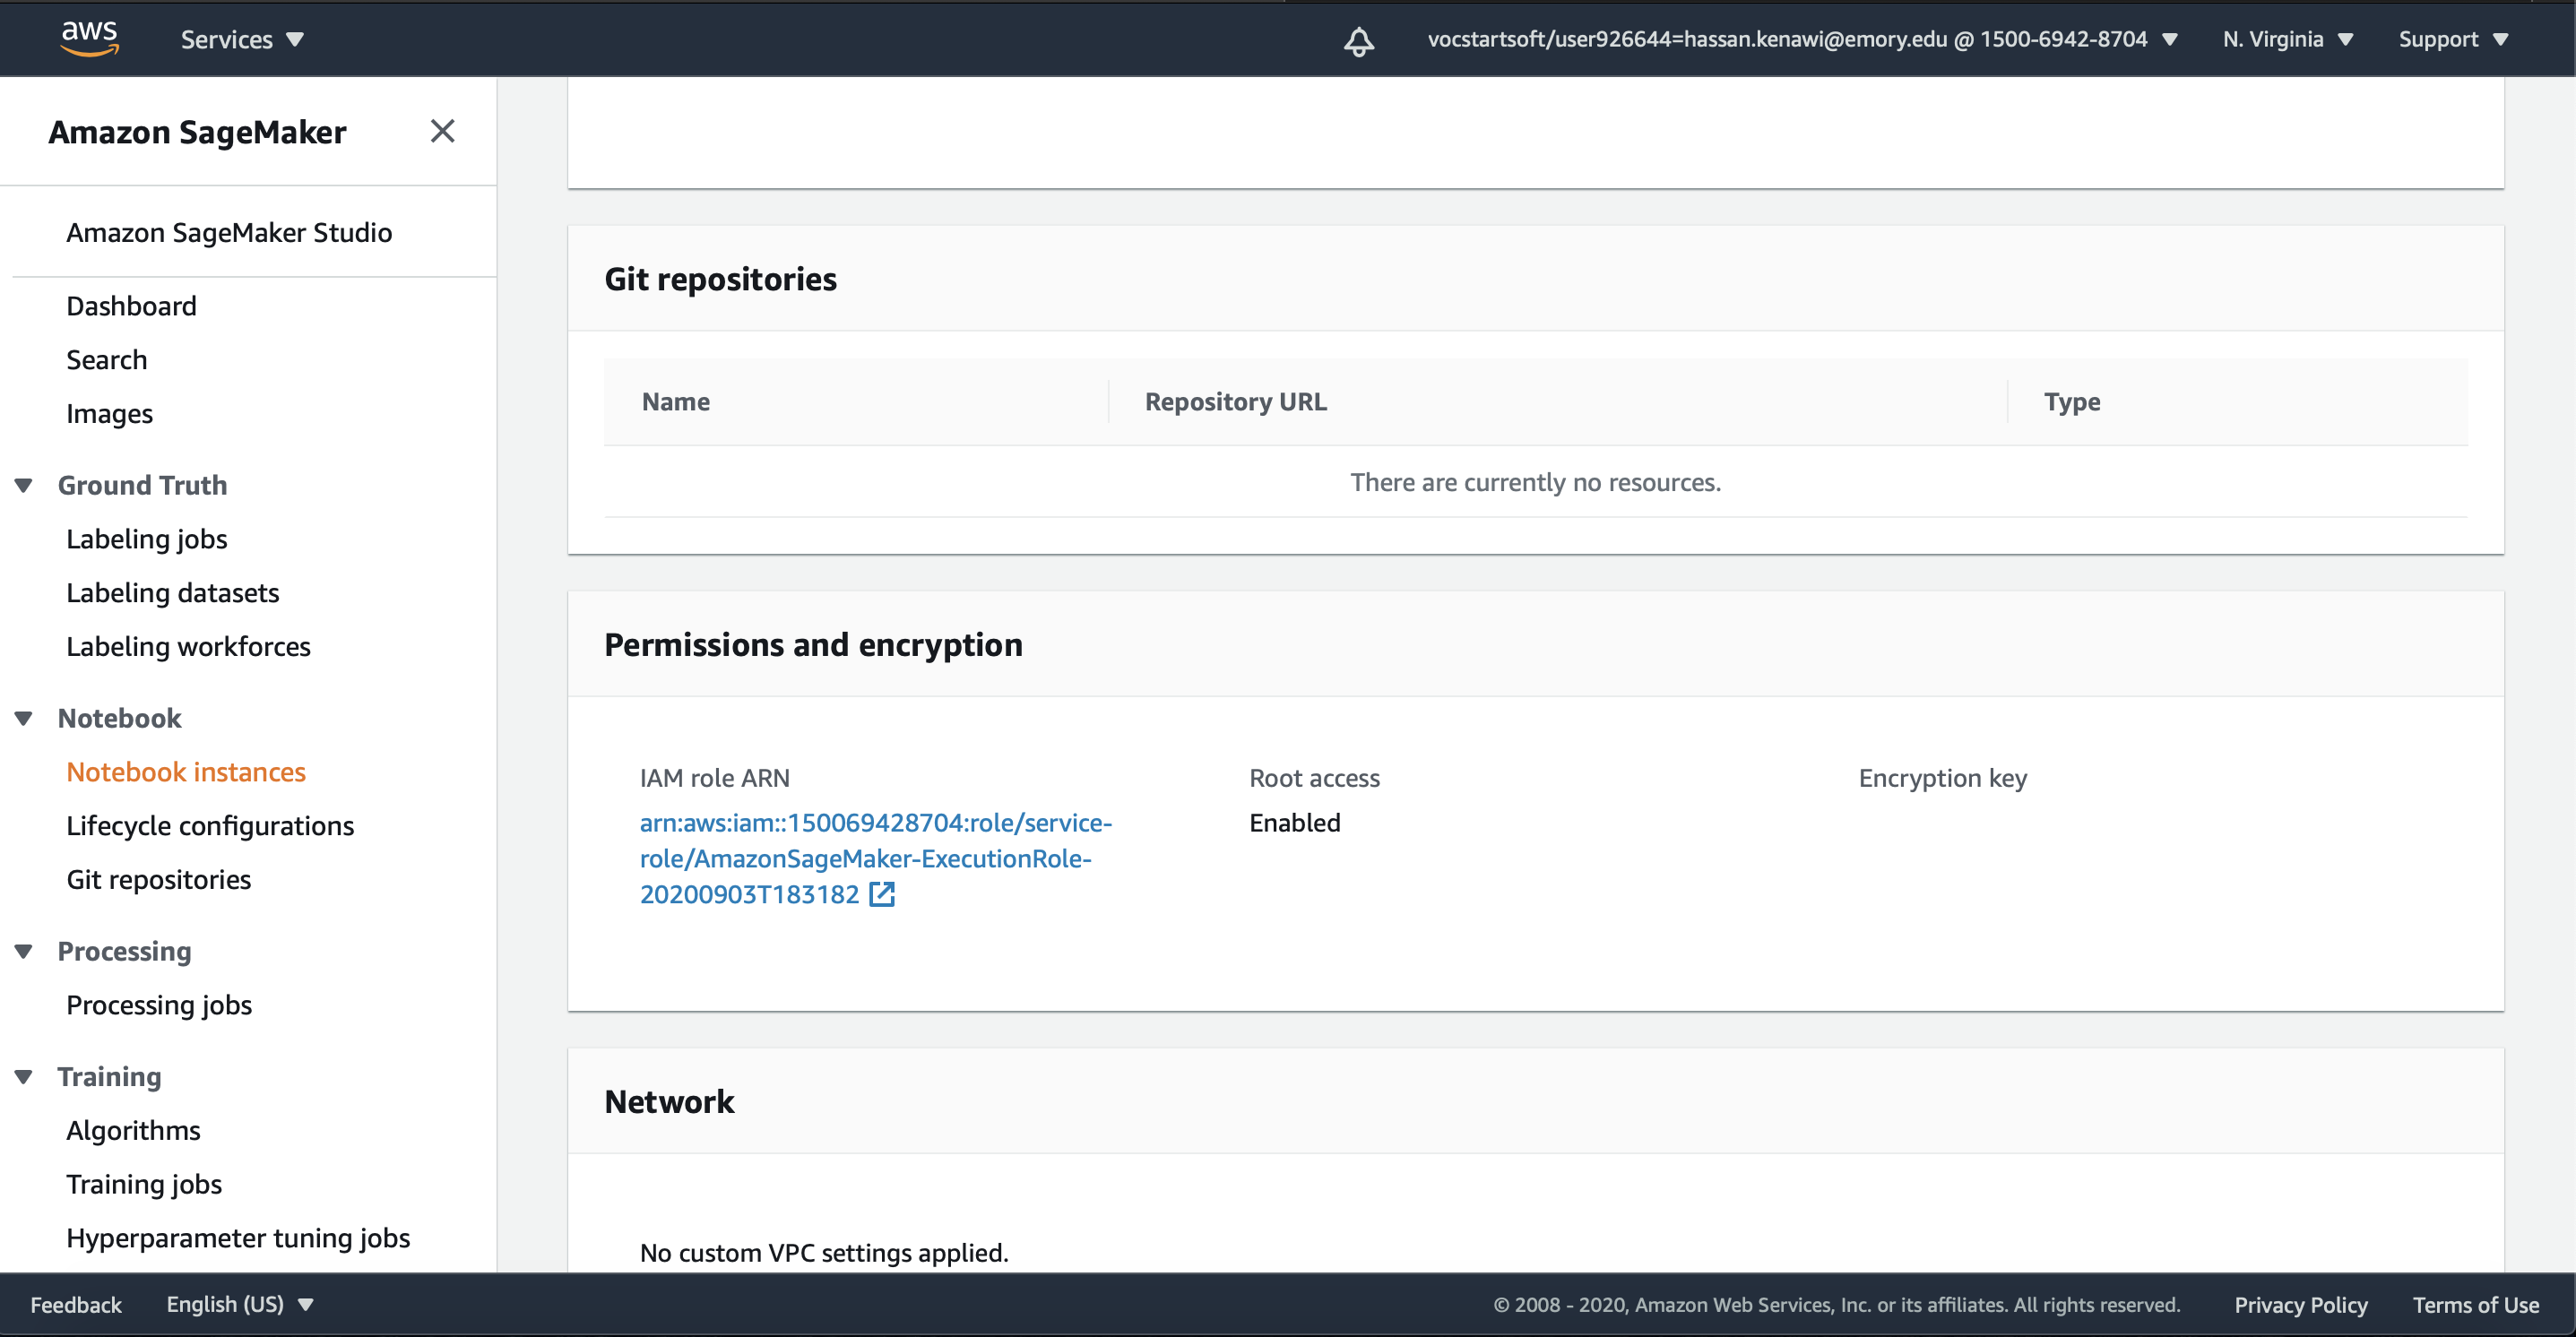




From here, click on the "IAM role ARN" link and it should take you to a webpage where you can add the permissions that are needed. Your screen should now look similar to this other than the permissions that you already have for the account attached to your notebook instance. 

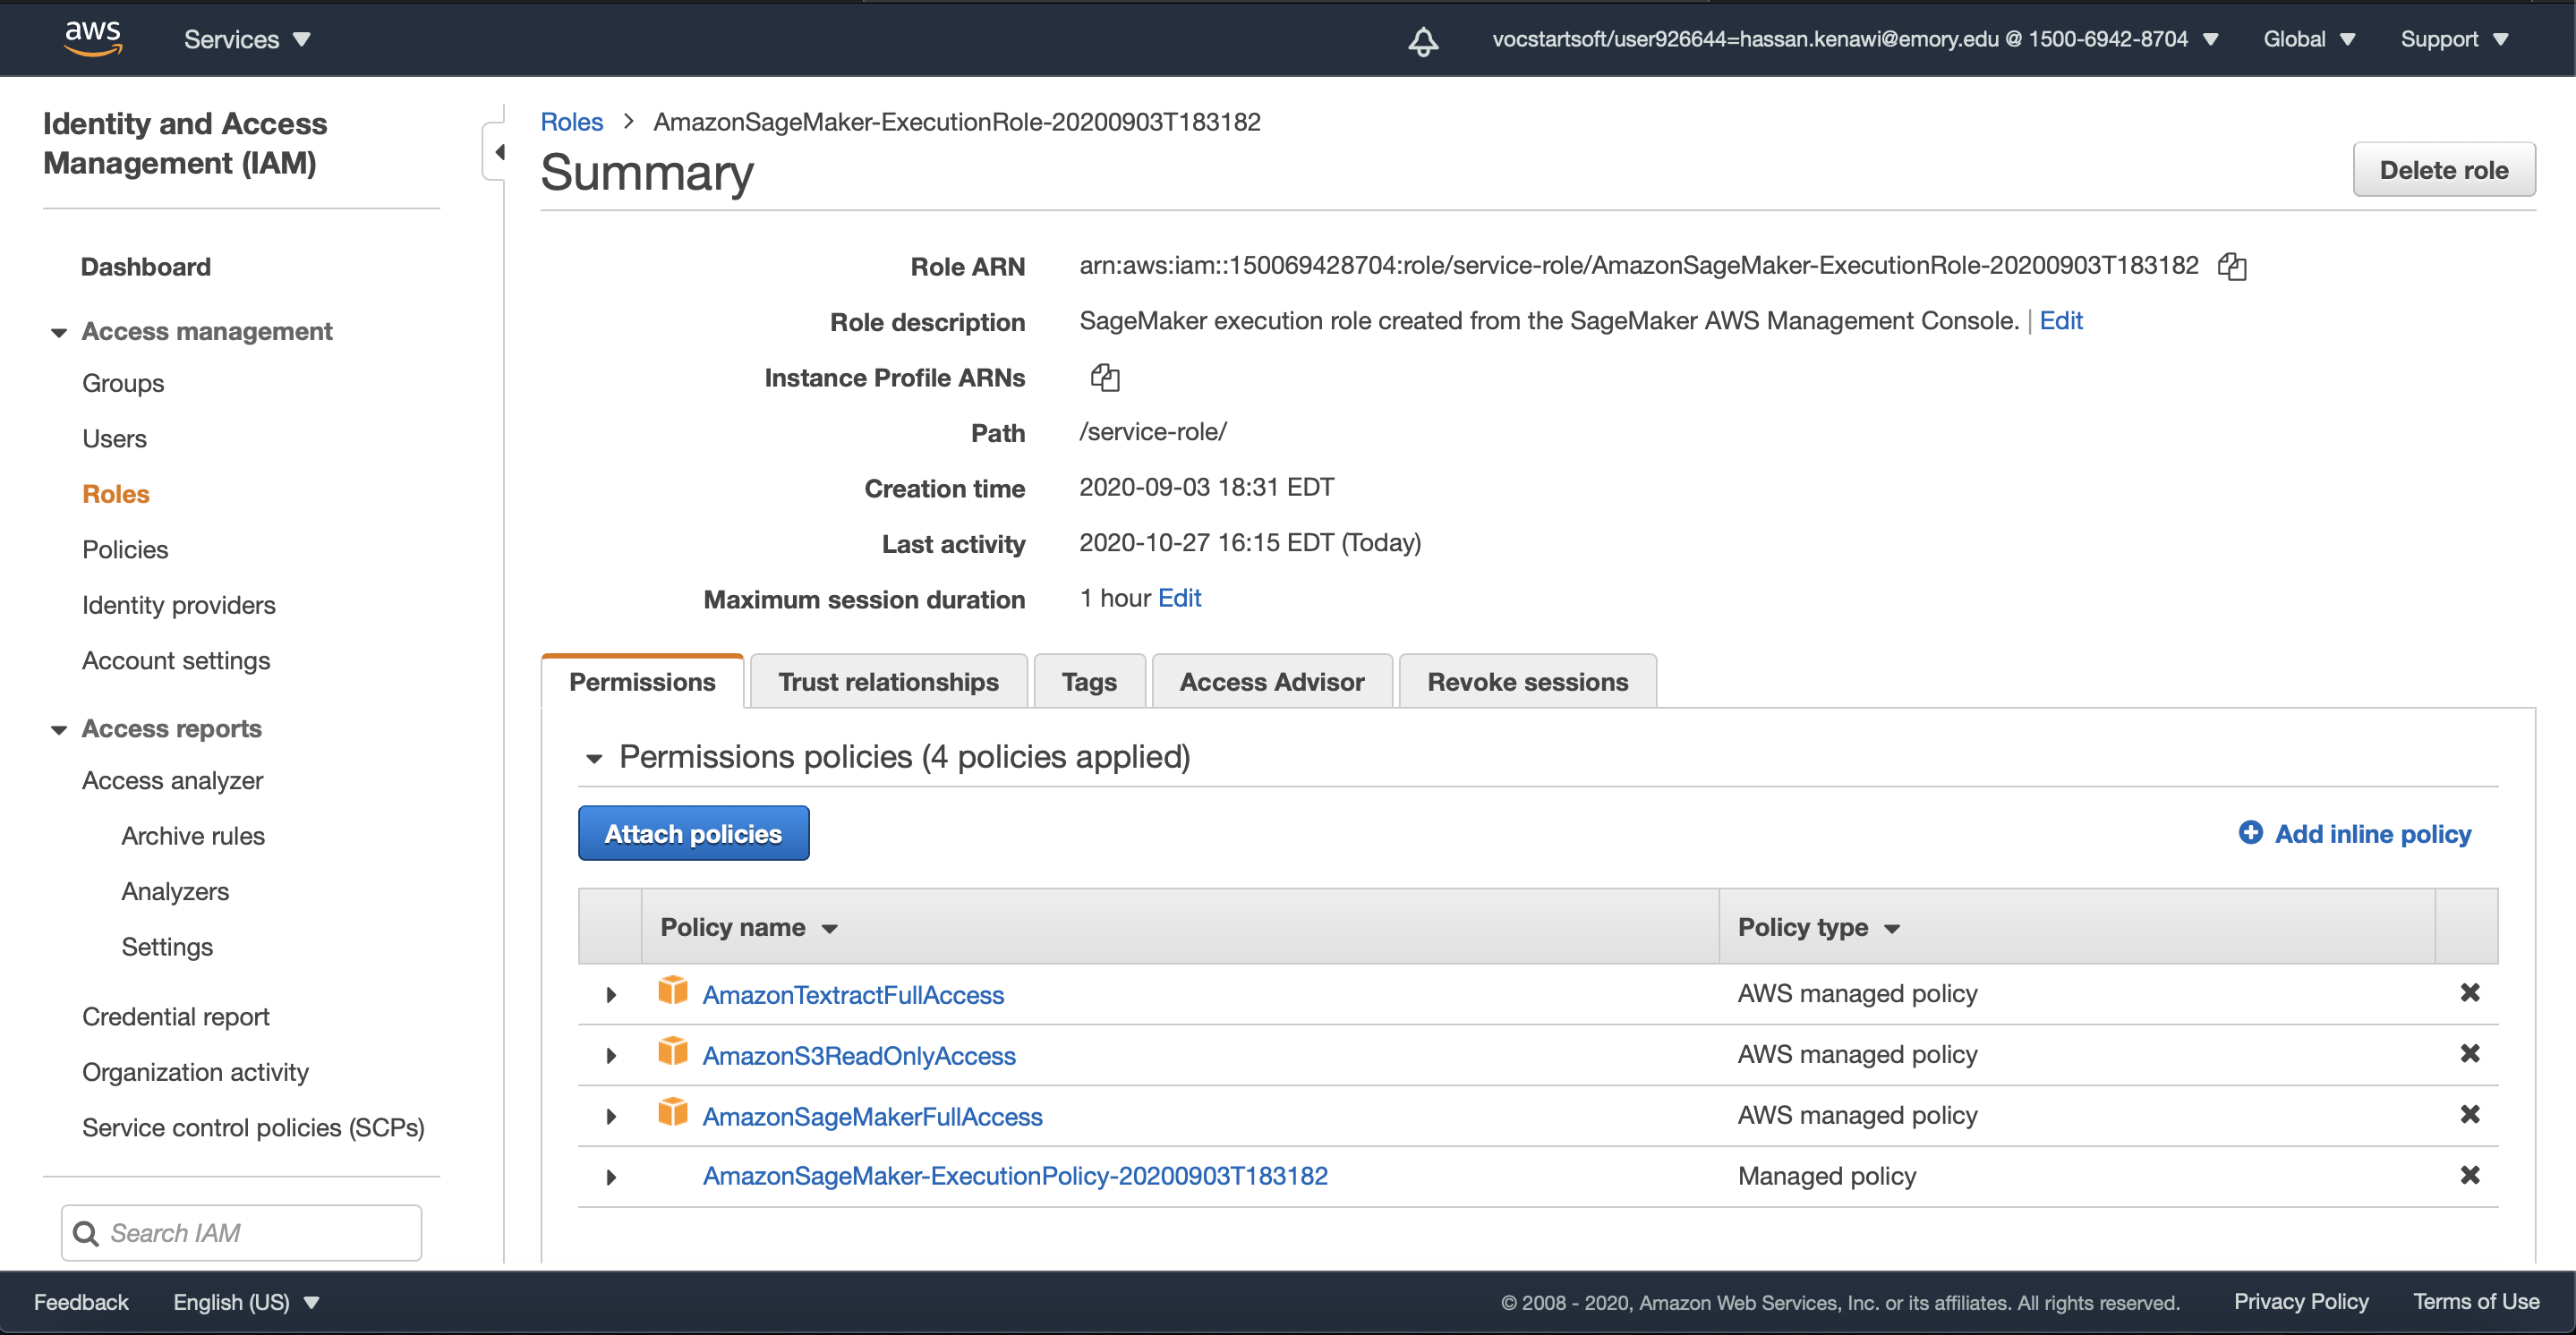

Go ahead and click on the "Attach Policies" button and add the policy "AmazonTranscribeFullAccess". After you have done this, you can now begin using the Transcribe API. 

## Our Process

### Getting the data

The data that we used is simply audio files of any number of songs that you want. For example, we retrieved roughly 50 songs in order to have a large enough sample size to conduct our analysis. In order to download these songs, you need to visit this [website](https://freemp3cloud.com) where you can search for the song of your choosing and download an MP3 audio file onto your computer. 

Now, considering we wanted to test how the accuracy of the transcriptions will be effected by speed, you will need to go to a [audio speed changing](https://audiotrimmer.com/audio-speed-changer/) website. This is our preferred website and if you click on the link your screen should look like this. 

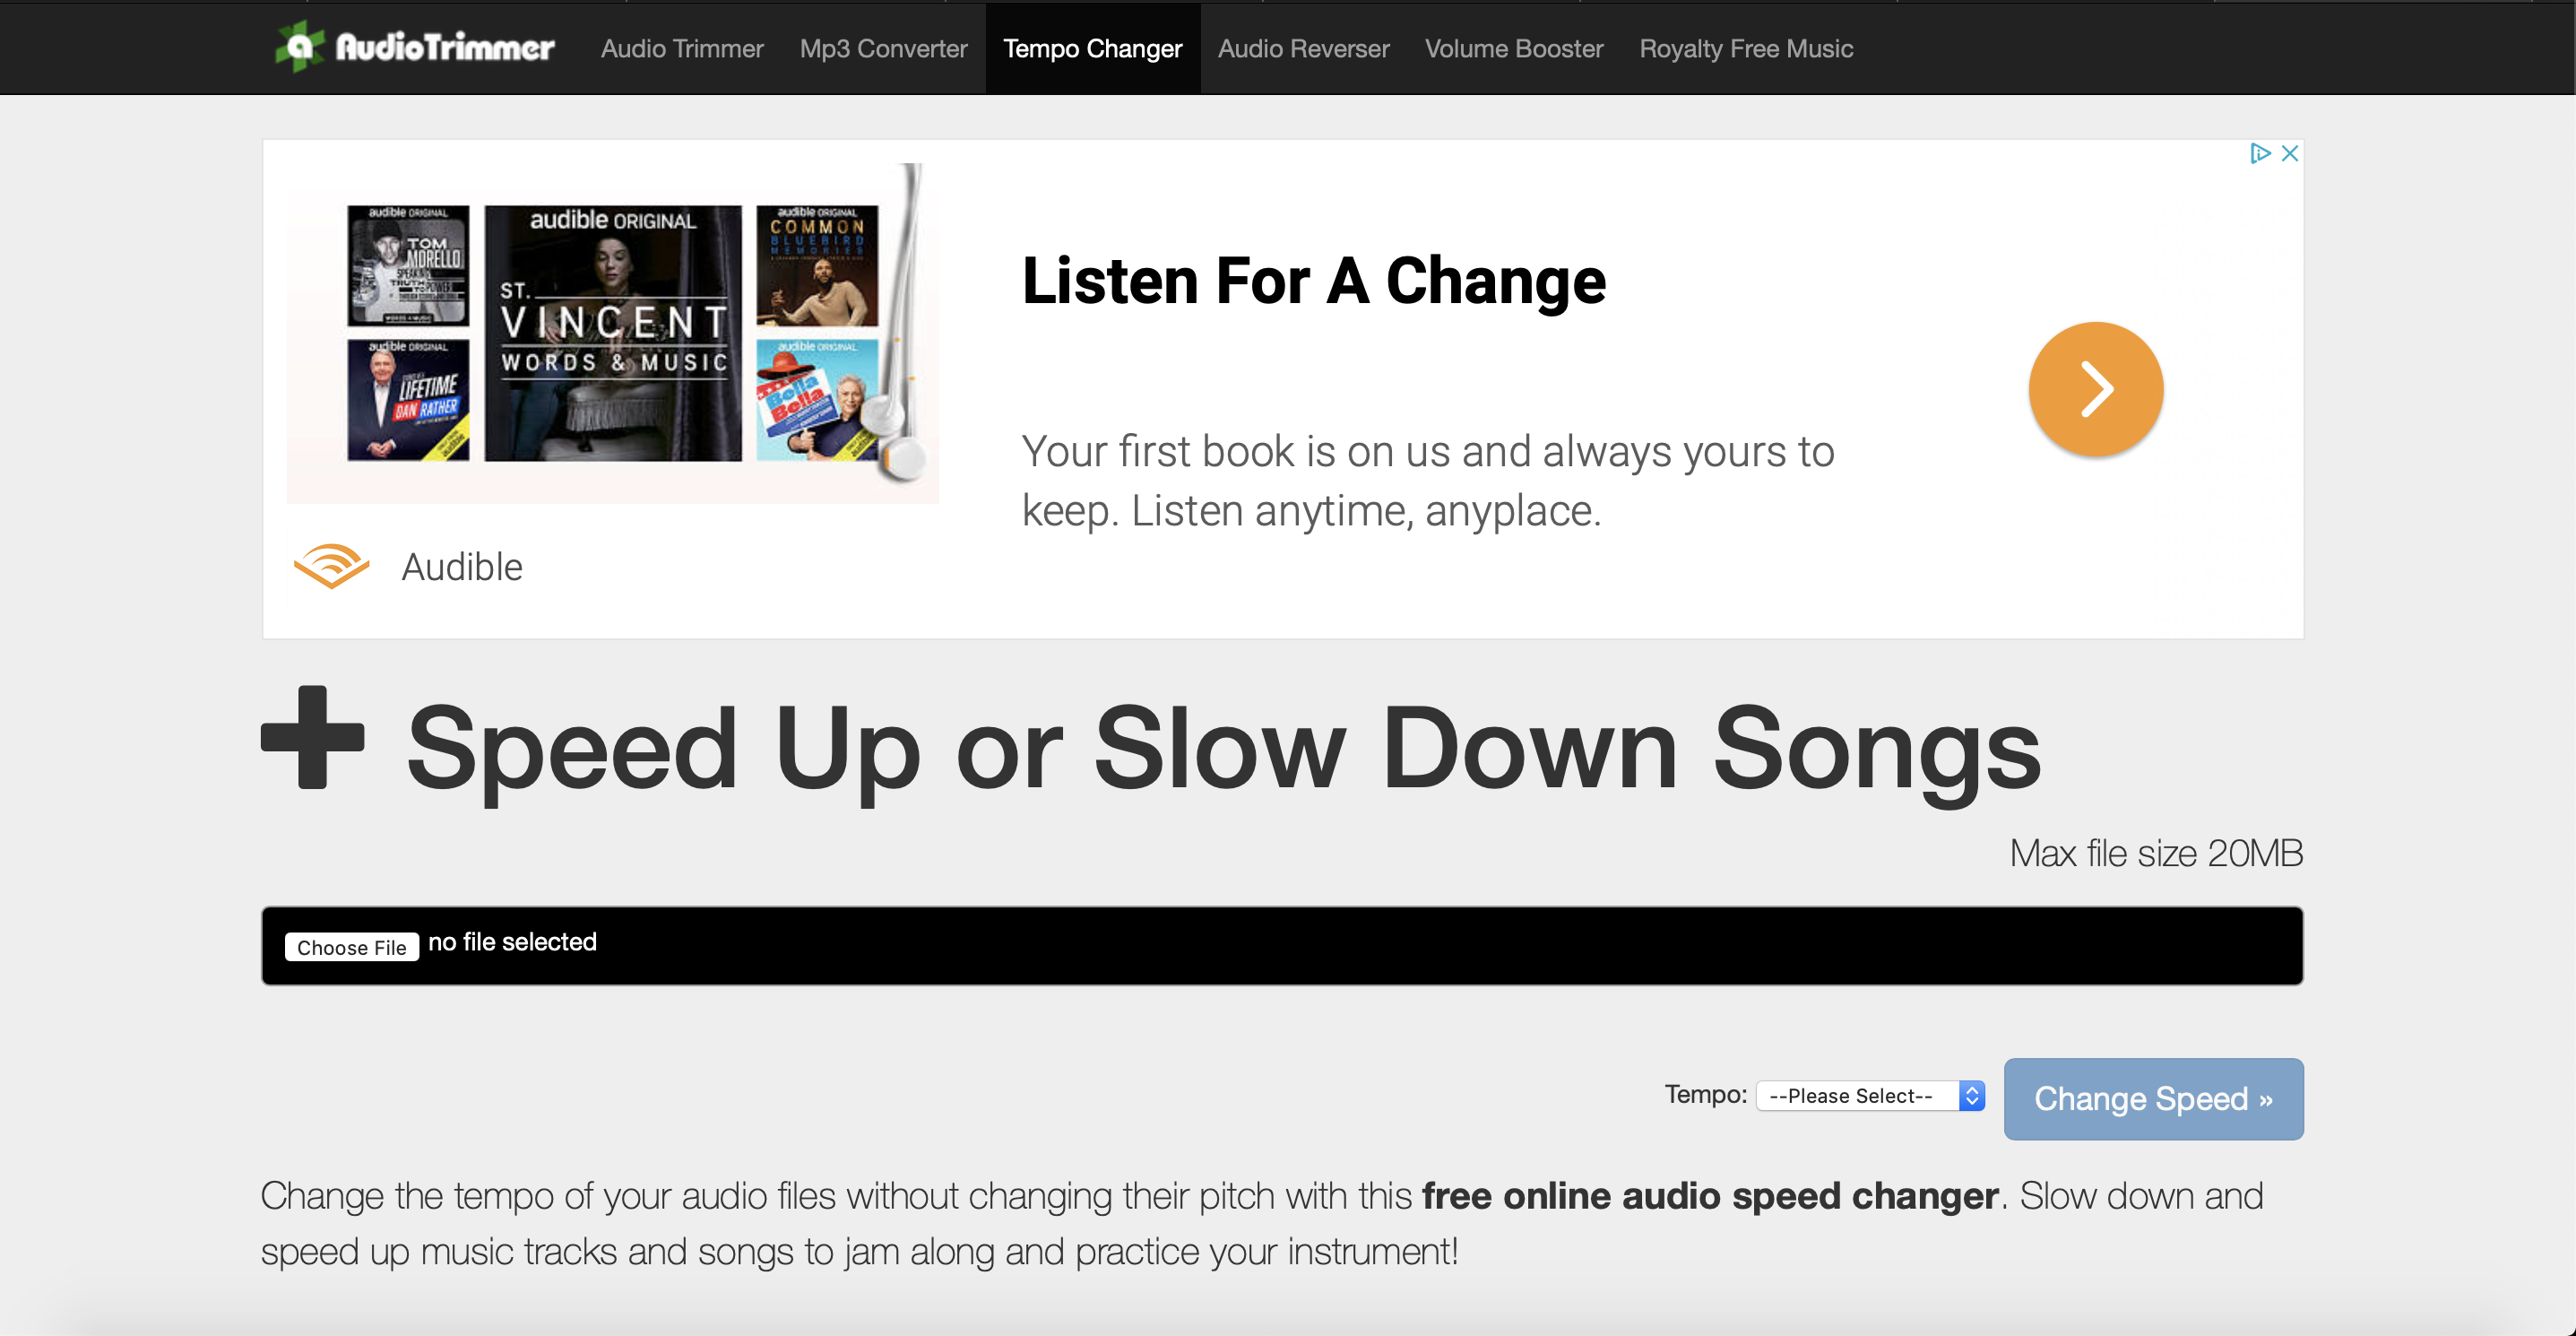

In order to use this website, you will input the audio file whose speed you want to change and you will click on `tempo`. This will lead you to a drop down menu with a range of speeds from half speed to double speed. Select your preferred speed, click `change speed` and download the new audio file. 

Once you have downloaded all the audio files that you need, you will have to start using the AWS services. The next step from here is dropping the data into an S3 bucket.

### Speech Input

As the documentation says, the first step to transcribing an audio file is to store that file in an S3 Bucket. S3 is another service in AWS that you can learn more about through its [documentation](https://docs.aws.amazon.com/AmazonS3/latest/gsg/GetStartedWithS3.html). It is used for internet storage and can be used in coinjuction with other AWS services. 

In order to be able to retrieve your audio file through the Transcribe console later in the process, you will need to log-in to your AWS Educate account and go to the S3 service. From there you will either click on a bucket that you have already created or create a new one for this specific task. 
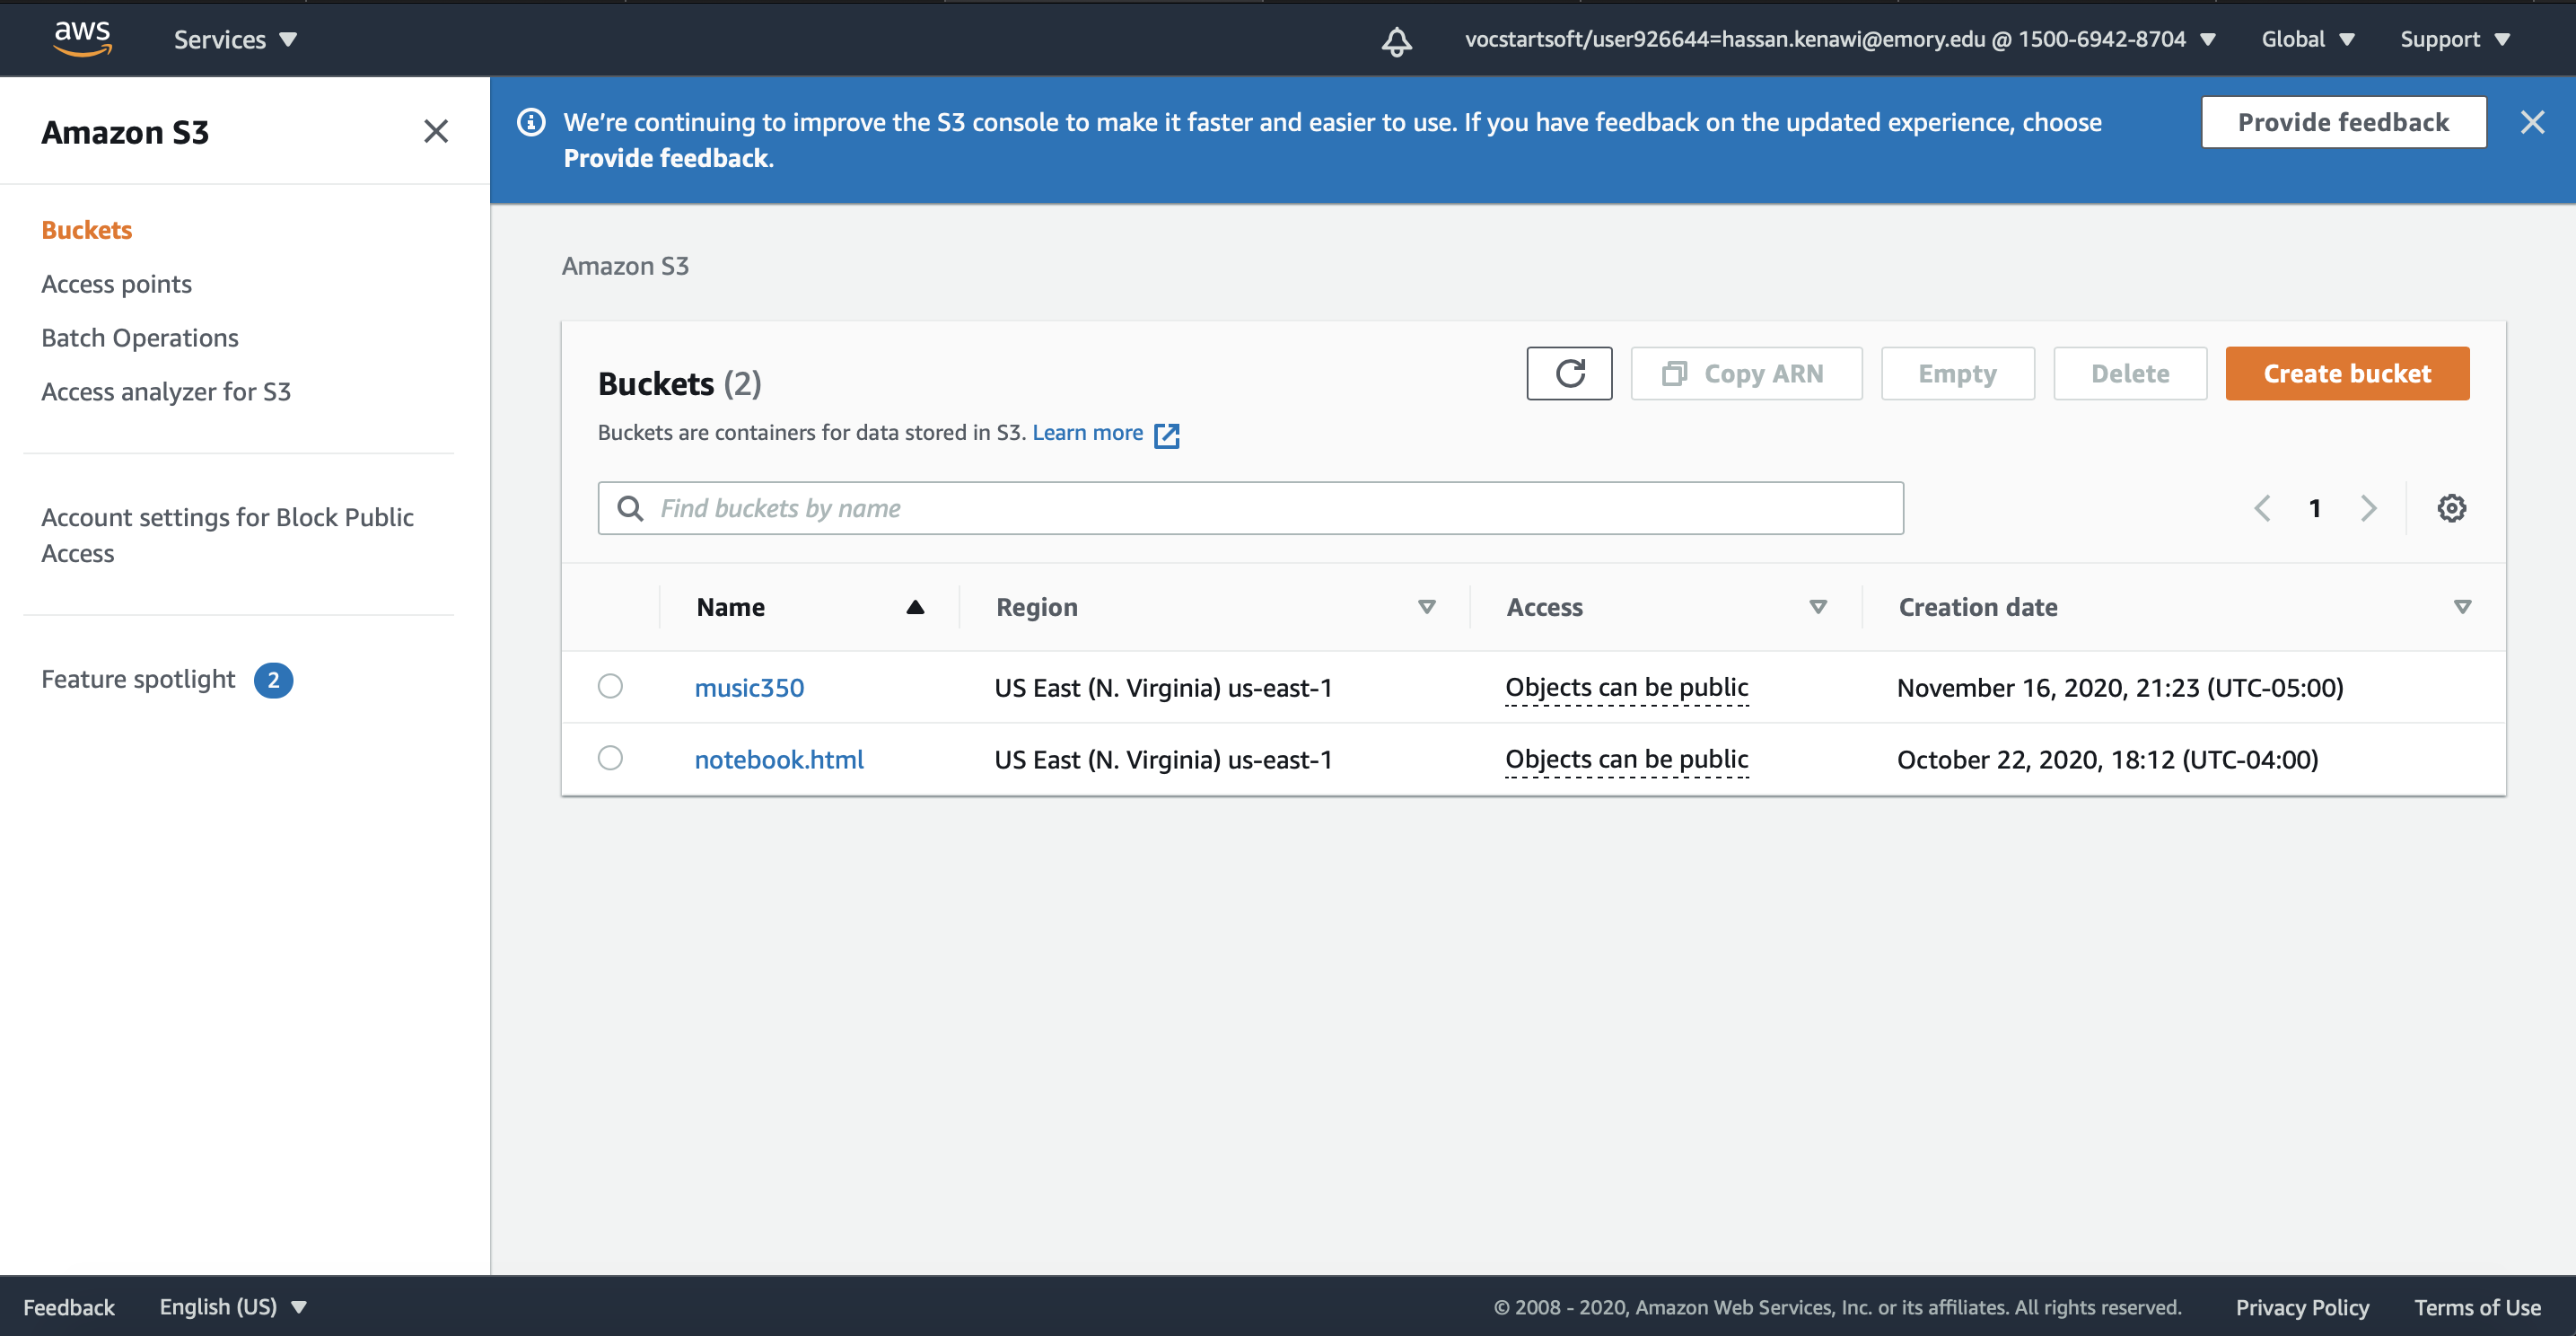

To create a new bucket, click on `Create Bucket` in the top right hand corner and choose the permissions that you want. If you already have a bucket created, go ahead and click on it to begin uploading your audio files. 

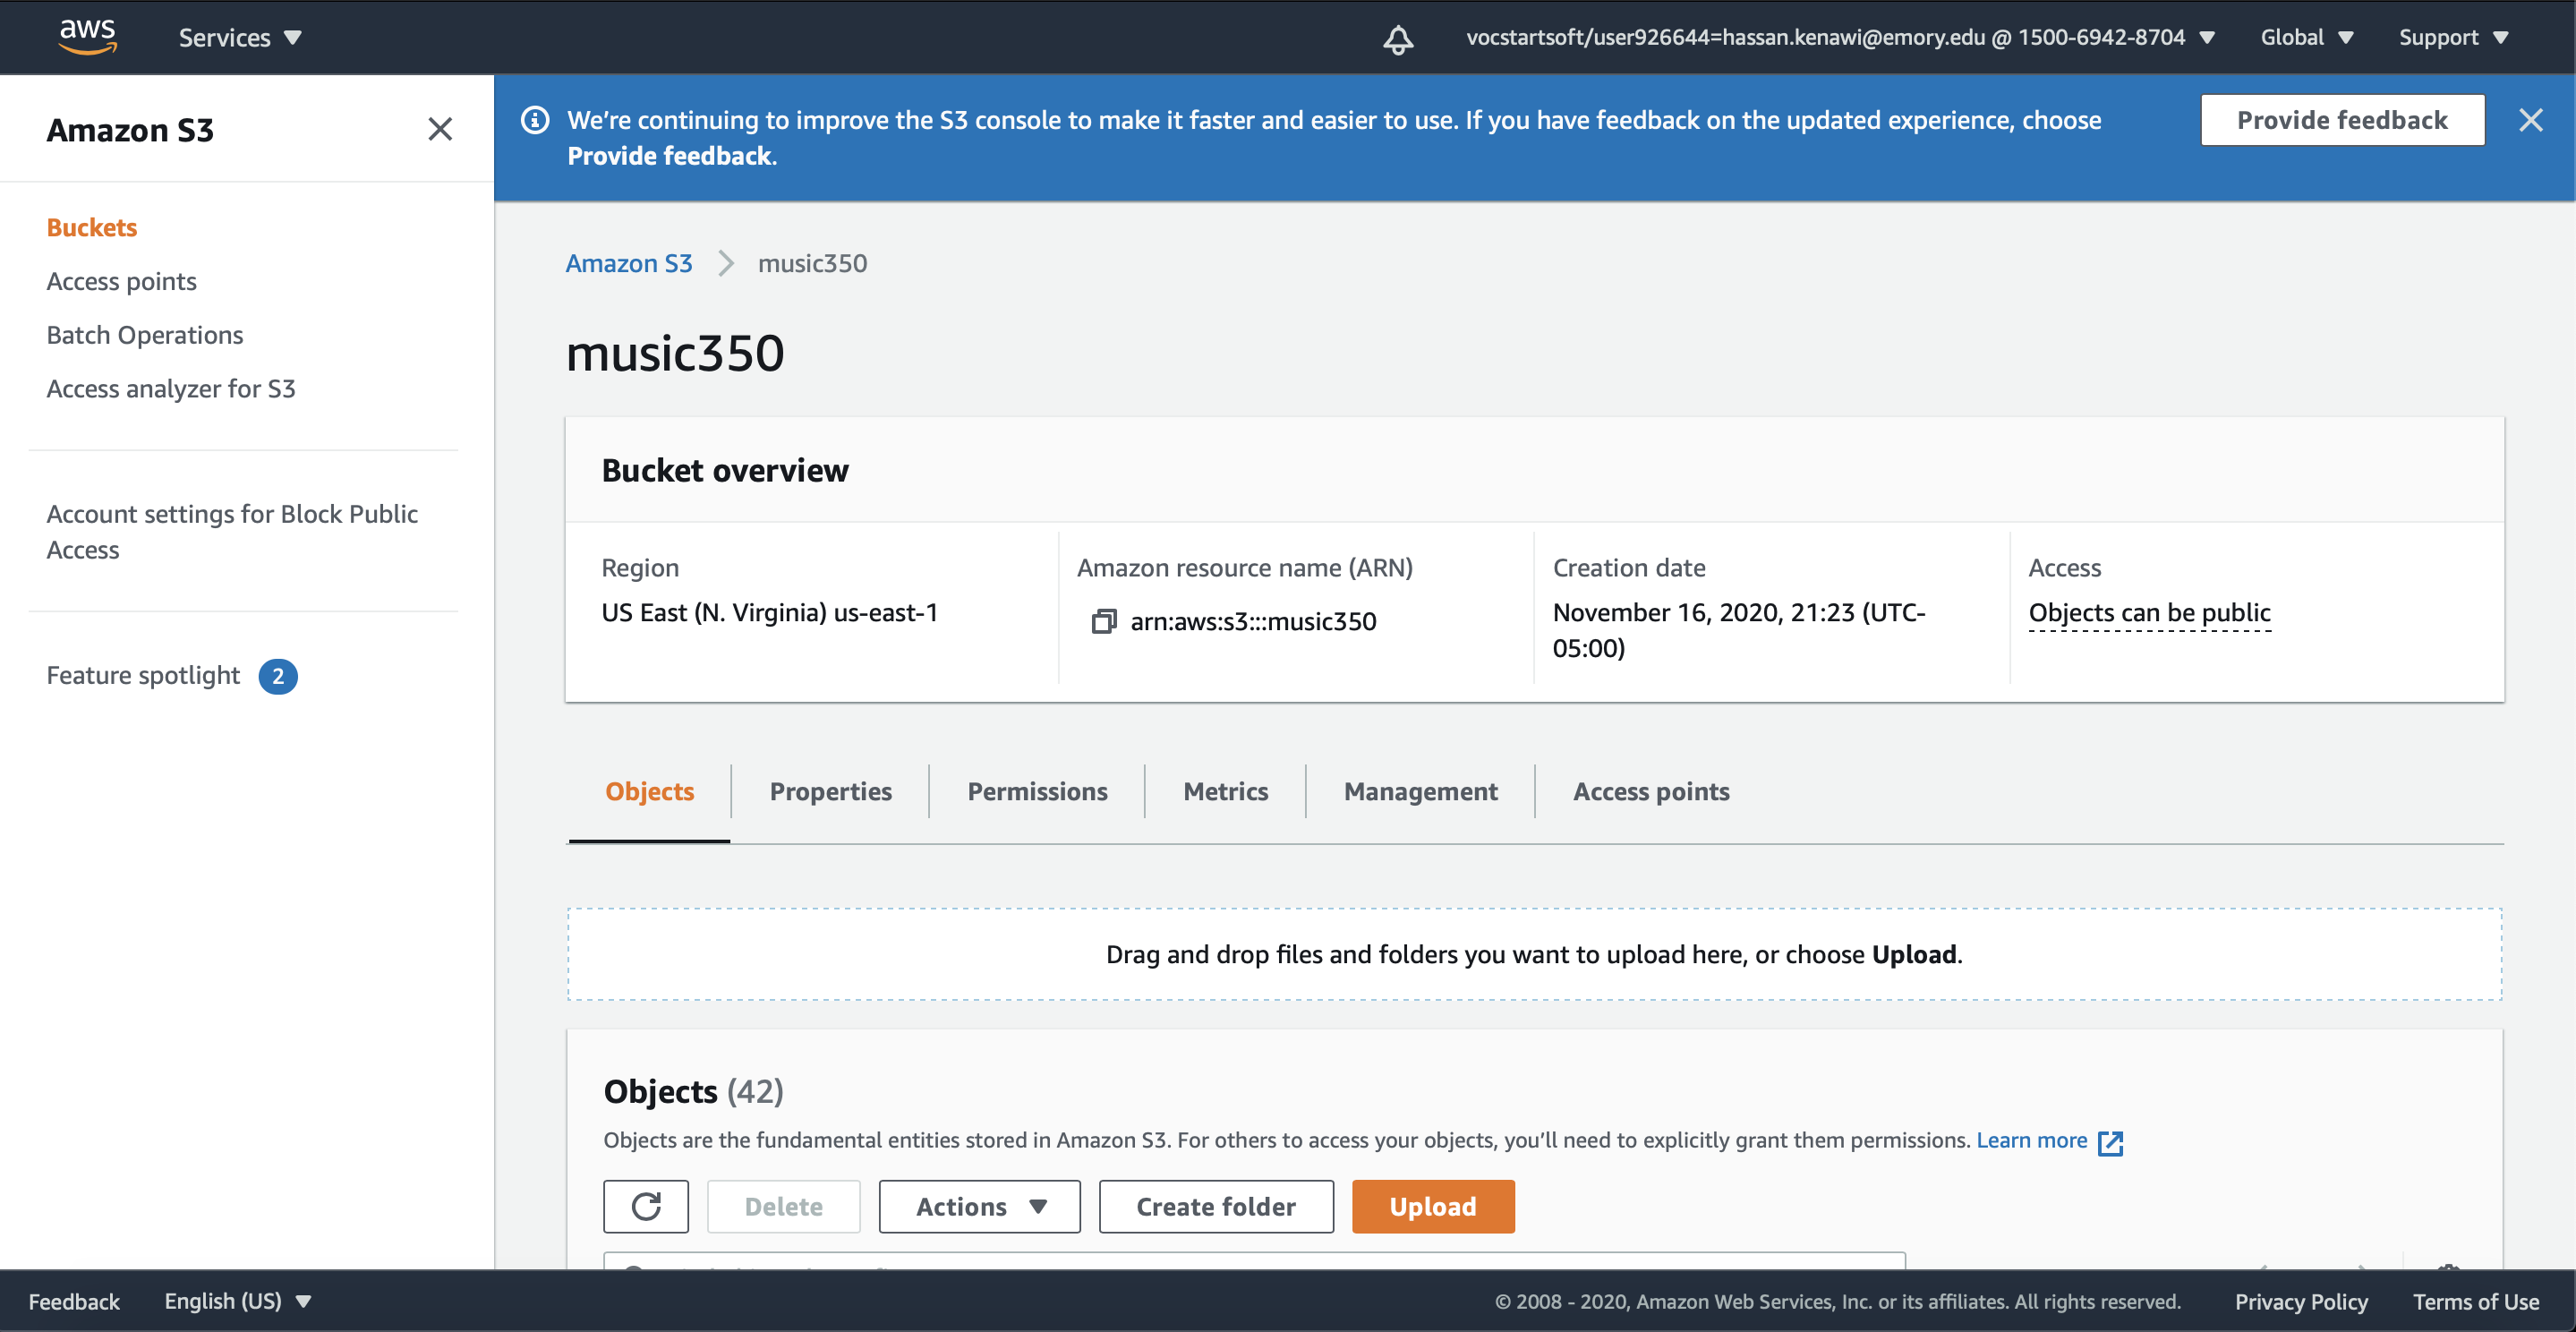

Drag and drop your files into the assigned area and then you should find them uploaded where it says `Objects`. Once you do this, you are ready to begin transcribing the audio files and will need to search for the Amazon Transcribe service and go to its portal. 

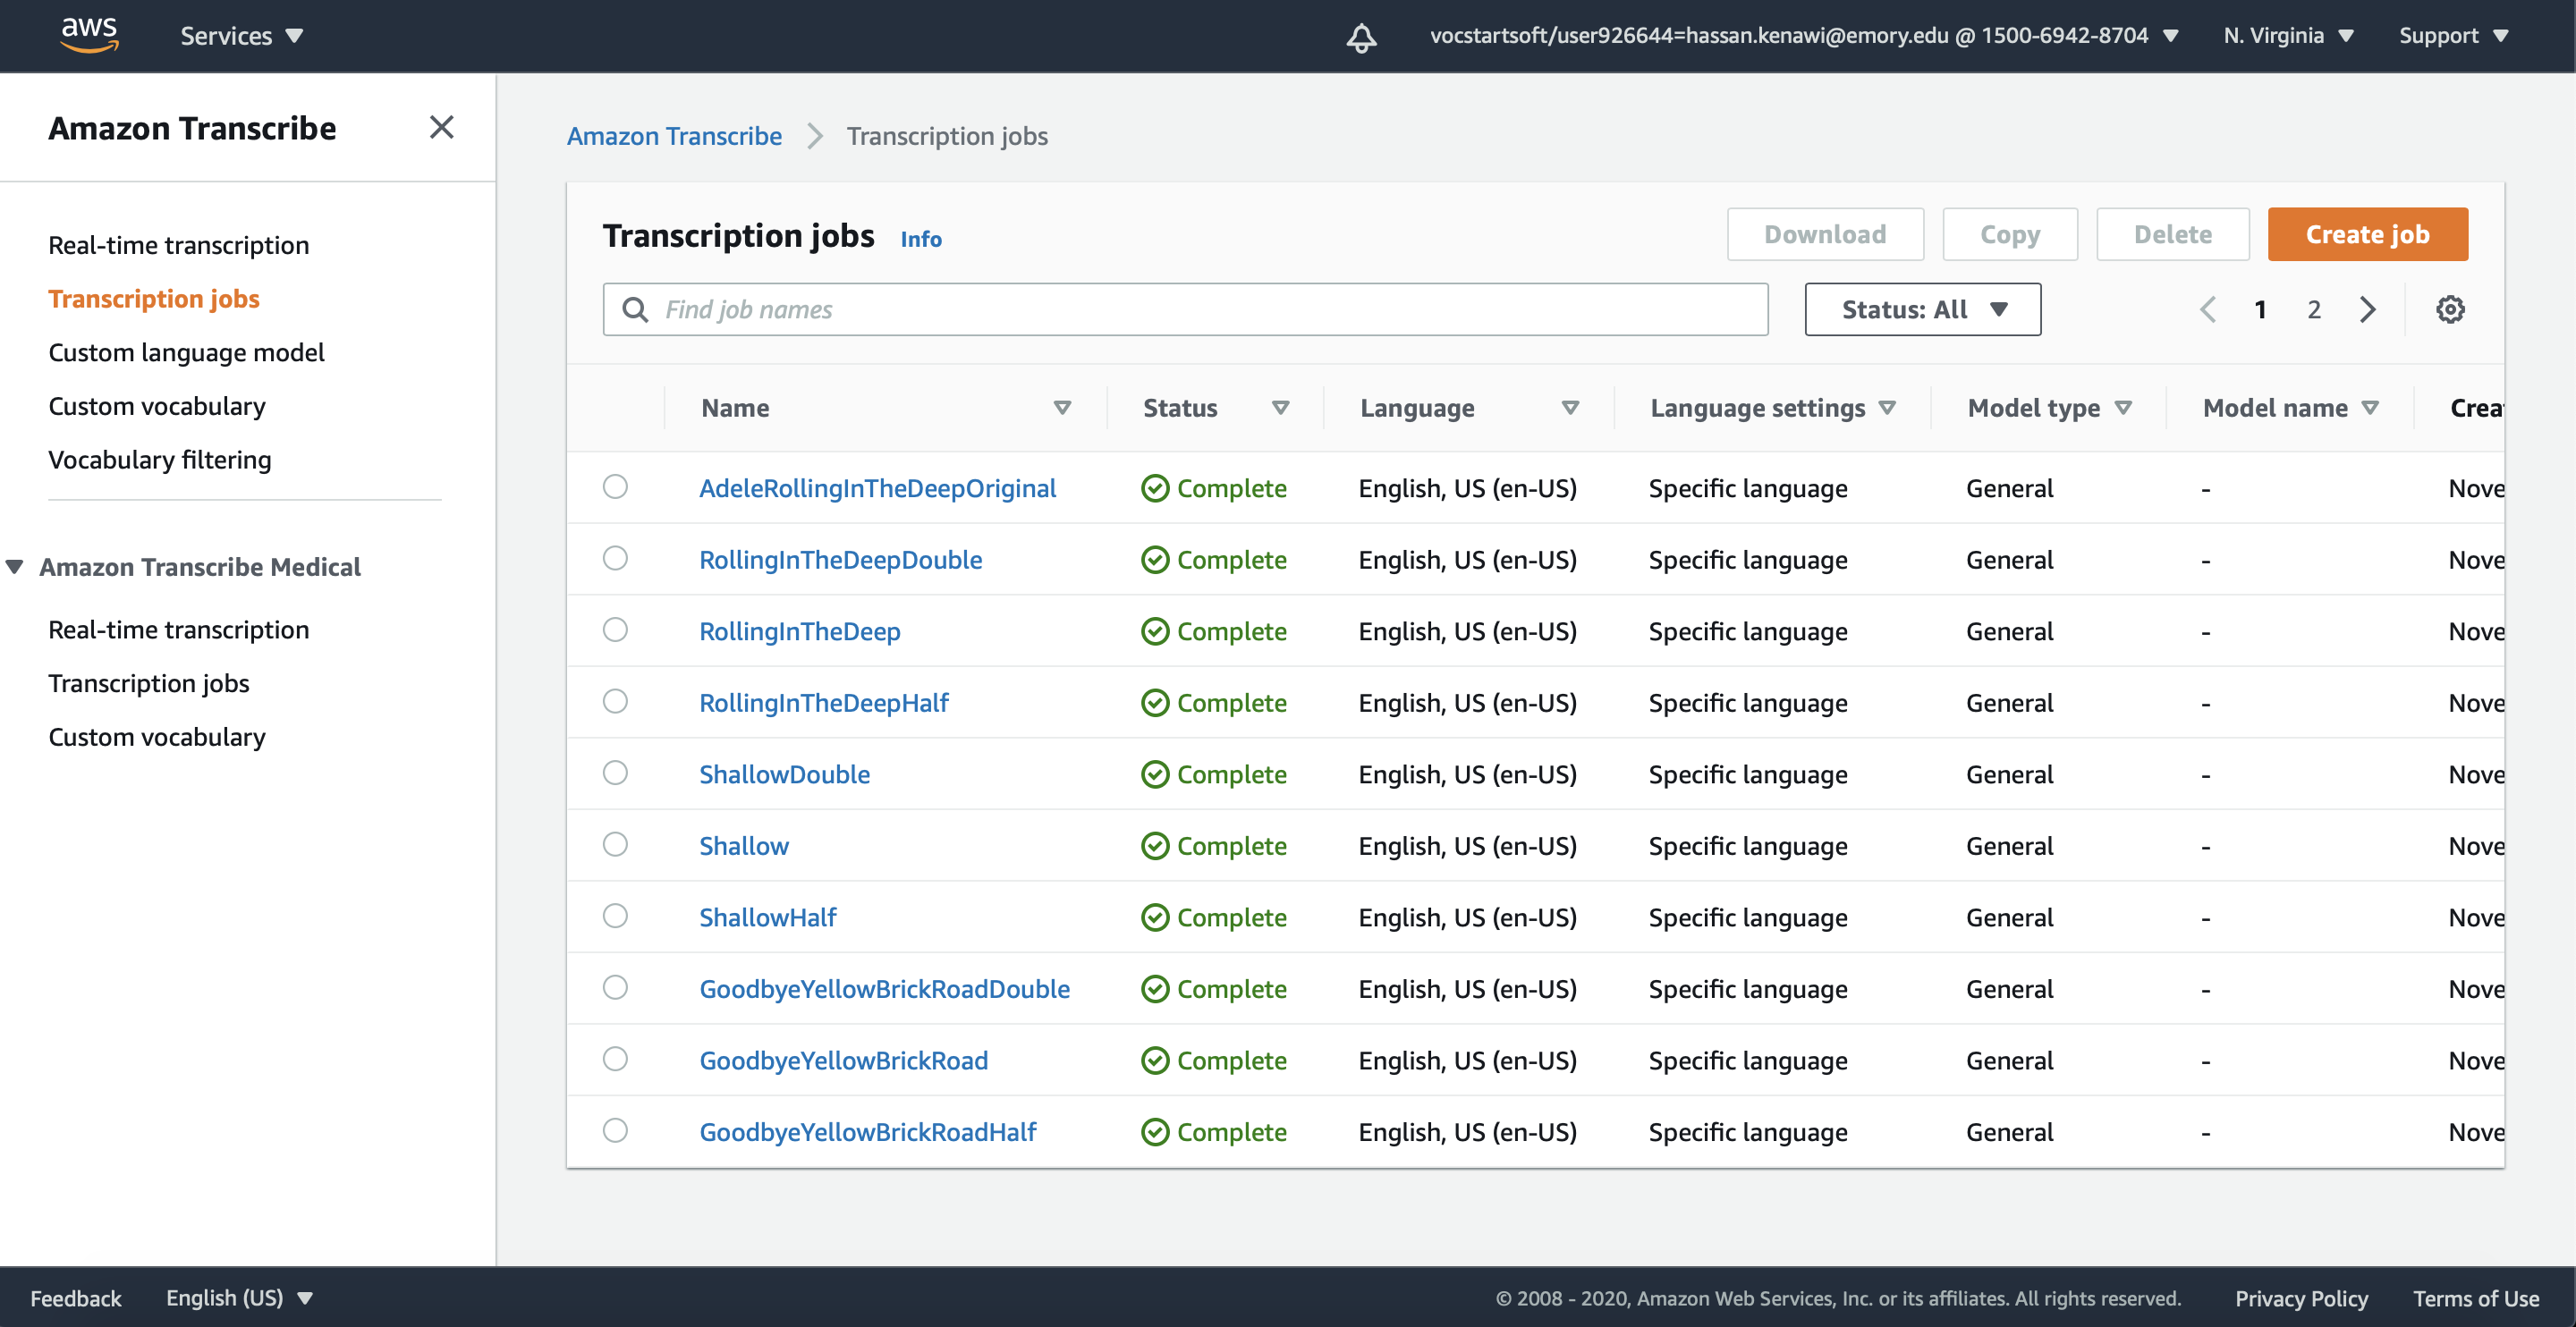

Once you are there your screen should look like above and you need to click on the `Create job` button in the top right corner. This will lead you to a screen where you input a name for your transcription job and choose the file that you want transcribing from the bucket of your choice. You can then click next and the transcription job will start working. Once it is complete, it will say complete in green with a check mark as it does in the picture above. 

Next, click on it to receive the output of the transcription. 

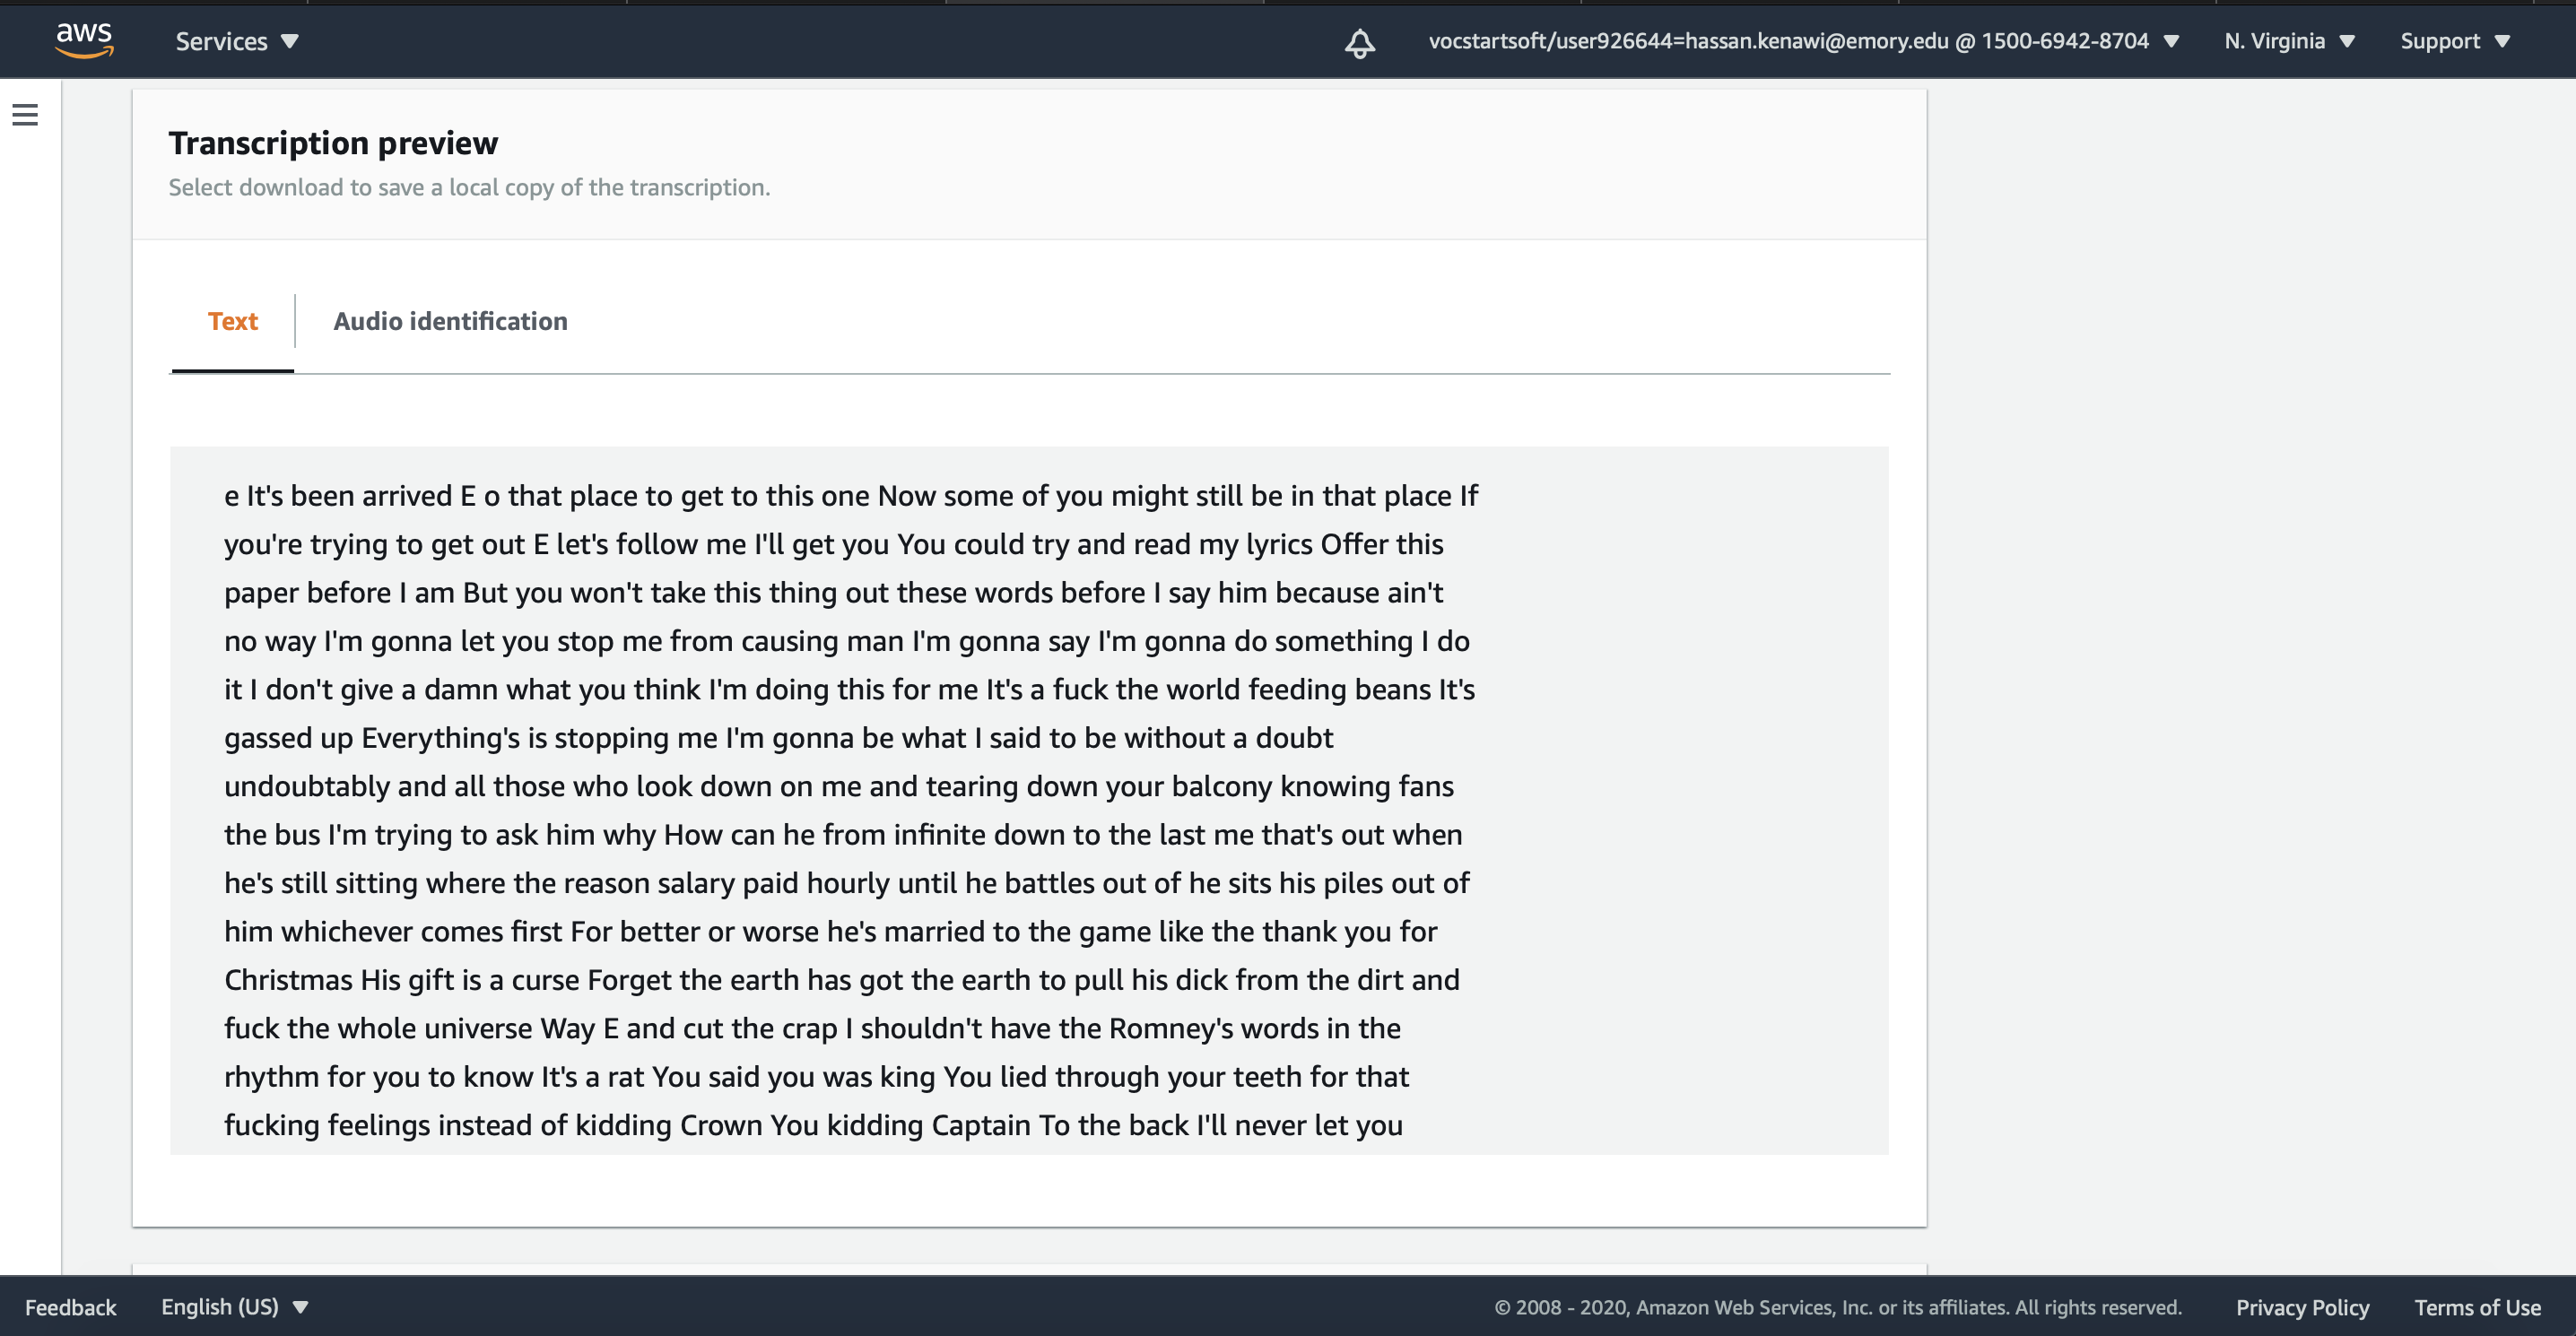

When you click on the name of the transcription job, you will be redirected to a page that gives you the details of the transcription. If you scroll down just a bit, you will find the section Transcription preview just like the one pictured above. This text is the output of your transcription and you will need it for the next step. 

### Calculating the accuracy of the transcription

The first part of this section is to go on Google and search for the lyrics of the song that you just transcribed. Once you have done that go to [this](https://countwordsfree.com/comparetexts) website. This website is used to compare different texts and calculate how similar they are to one another. 

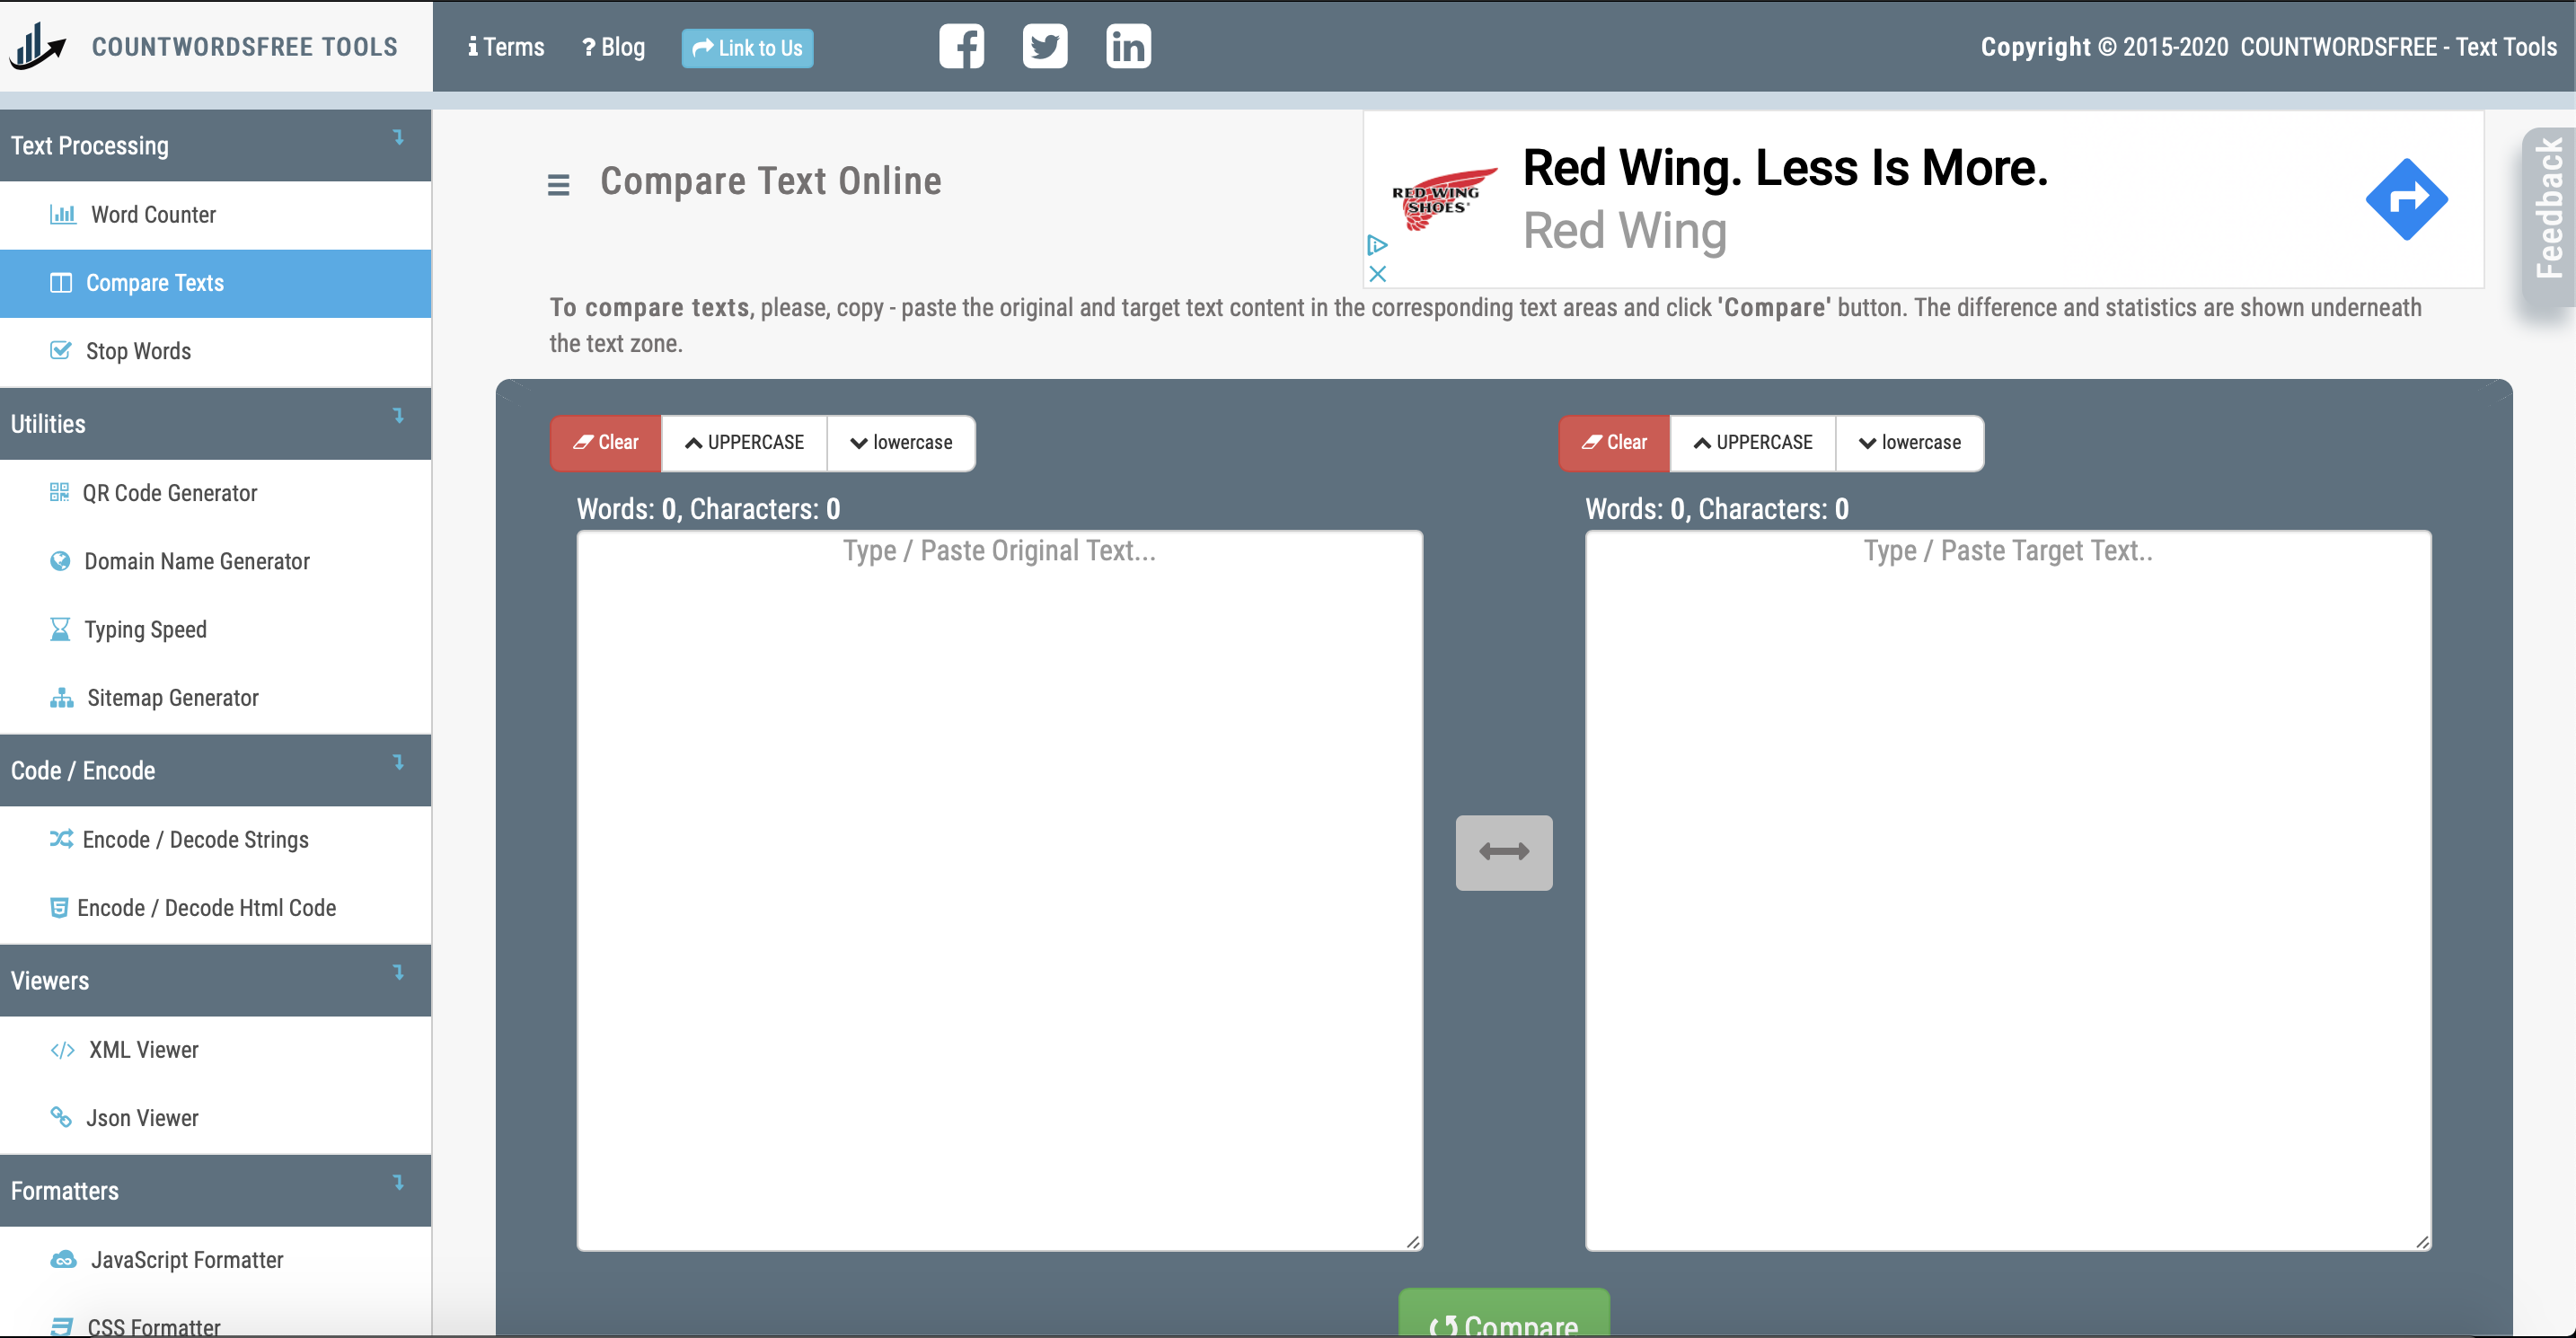

When your screen looks like the above image, copy and paste the lyrics from google into the left hand text entry box and click on the `lowercase` button. Then go back to your transcription text that we identified in the last section and copy and paste it into the right text entry box and click on the `lowercase` button. Then, click `Compare`. This will give you a percentage of how similar the right hand side is to the left hand side. That is the measure we used for accuracy in our analysis. 

This is how we created our data frame. We created a new excel file with the columns `Song`, `Genre`, `Speed`, and `Accuracy` and manually entered the results we got from every one of our songs. When we had done this for all 150 entries, we were ready to start out analysis. 

## The Results

In order to get a more in-depth explanation of our analysis, multivariable linear regression model, and data visualization, refer to the following [Github Repository](https://github.com/ally-jin/QTM-350-Final-Project-) and click on the Final Project Analysis Jupyter Notebook. This repository will also walk you through how to conduct this analysis using the AWS CLI instead of manually entering the audio files through the Transcribe console. So, if you are interested in learning more about how to connect AWS Transcribe to AWS SageMaker and the command line, click on the link and visit our repo!

To summarize the results, we were very underwhelmed with the overall accuracy of the AWS Transcriptions. We expected the files that had altered audio speeds would result in less accurate transcriptions, however, we did not forsee the average accuracy to be as low as it was. We believe that there are many reasons that this could have happened and a more thorough explanation will be in the Final Project Analysis notebook we alluded to earlier. Overall, we were proven wrong and have come to the conclusion that the AWS Transcribe service should not be used to transcribe audio files of songs. I guess we are all going to have to continue trusting Google to help us scream our favorite songs while we are stuck in traffic. 

Thanks for reading everybody! I hope you learned more about AWS Transcribe and that you shouldnt use it for songs and I hope you enjoyed this blog post. 

Hasta LaVista!

## Authors

### Member 1: Mina Lee

> Year: Senior

> Major: Applied Mathematics and Statistics & Chinese

> [Mina's LinkedIn](https://www.linkedin.com/in/mina-lee-4755141a2/)

### Member 2: Elizabeth Park
> Year: Senior

> Major: Quantitative Sciences
 

### Member 3: Hassan Kenawi
> Year: Senior

> Major: Economics and Quantitative Sciences

> [Hassan's LinkedIn](https://www.linkedin.com/in/hassan-kenawi-390541127/)
<br/>
        
          
### Member 4: Denny Kim,
> Year: Senior

> Major: Quantitative Sciences

> [Denny's Linkedin](https://www.linkedin.com/in/dennykim77/)

### Memeber 5: Ally Jin
> Year: Junior

> Major: Biology and Quantitative Sciences (Economics)
